In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [53]:
zip_dir_base = './datasets'

In [56]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'faces')


train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_true_dir = os.path.join(train_dir, 'true')
train_false_dir = os.path.join(train_dir, 'false')

validation_true_dir = os.path.join(validation_dir, 'true')
validation_false_dir = os.path.join(validation_dir, 'false')

In [57]:
num_true_tr = len(os.listdir(train_true_dir))
num_false_tr = len(os.listdir(train_false_dir))

num_true_val = len(os.listdir(validation_true_dir))
num_false_val = len(os.listdir(validation_false_dir))

total_train = num_true_tr + num_false_tr
total_val = num_true_val + num_false_val


In [58]:
print('С одним человеком в тестовом наборе данных: ', num_true_tr)
print('С двумя в тестовом наборе данных: ', num_false_tr)

print('С одним человеком в валидационном наборе данных: ', num_true_val)
print('С двумя в валидационном наборе данных: ', num_false_val)
print('--')
print('Всего изображений в тренировочном наборе данных: ', total_train)
print('Всего изображений в валидационном наборе данных: ', total_val)

С одним человеком в тестовом наборе данных:  90
С двумя в тестовом наборе данных:  94
С одним человеком в валидационном наборе данных:  8
С двумя в валидационном наборе данных:  9
--
Всего изображений в тренировочном наборе данных:  184
Всего изображений в валидационном наборе данных:  17


In [59]:
BATCH_SIZE = 100 # количество тренировочных изображений для обработки перед обновлением параметров модели
IMG_SHAPE = 150 # размерность 150x150 к которой будет преведено входное изображение

In [60]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [61]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                          directory=train_dir,
                                                          shuffle=True,
                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                          class_mode='binary')

Found 184 images belonging to 2 classes.


In [62]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE),
                                                              class_mode='binary')

Found 17 images belonging to 2 classes.


In [63]:
sample_training_images, _ = next(train_data_gen)

In [64]:
# данная функция отрисует изобраэения в сетке размером 1х5
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

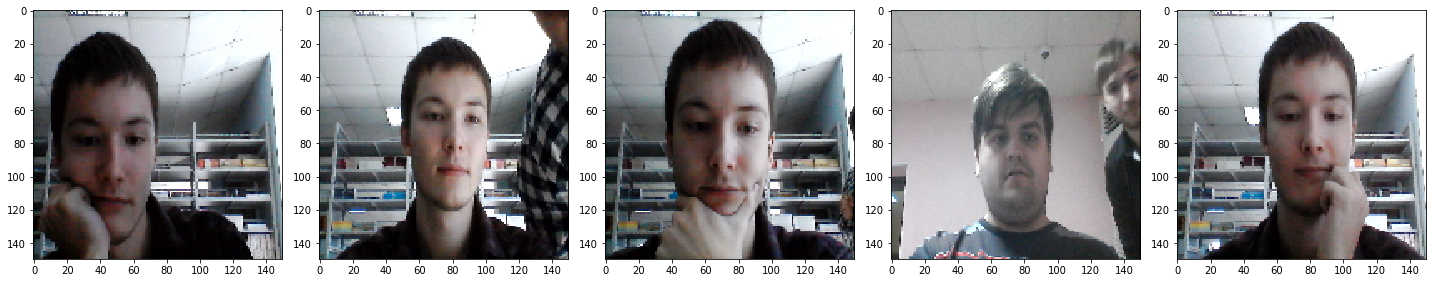

In [65]:
plotImages(sample_training_images[:5]) # отрисовываем изображения 0-4

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [39]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [41]:
EPOCHS = 15
with tf.device('/gpu:0'):
    history = model.fit_generator(
        train_data_gen,
        steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
        epochs=EPOCHS,
        validation_data=val_data_gen,
        validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
    )

Epoch 1/15
2/2 [==============================] - 5s 2s/step - loss: 0.6765 - accuracy: 0.5217 - val_loss: 1.4797 - val_accuracy: 0.5294
Epoch 2/15
2/2 [==============================] - 6s 3s/step - loss: 1.0722 - accuracy: 0.5109 - val_loss: 0.7427 - val_accuracy: 0.4706
Epoch 3/15
2/2 [==============================] - 6s 3s/step - loss: 0.7112 - accuracy: 0.4891 - val_loss: 0.6824 - val_accuracy: 0.4706
Epoch 4/15
2/2 [==============================] - 5s 3s/step - loss: 0.6723 - accuracy: 0.6304 - val_loss: 0.6667 - val_accuracy: 0.5294
Epoch 5/15
2/2 [==============================] - 5s 3s/step - loss: 0.6647 - accuracy: 0.6196 - val_loss: 0.6388 - val_accuracy: 0.7647
Epoch 6/15
2/2 [==============================] - 5s 3s/step - loss: 0.6430 - accuracy: 0.7337 - val_loss: 0.5999 - val_accuracy: 0.7647
Epoch 7/15
2/2 [==============================] - 5s 3s/step - loss: 0.6015 - accuracy: 0.7935 - val_loss: 0.5283 - val_accuracy: 0.8235
Epoch 8/15
2/2 [=========================

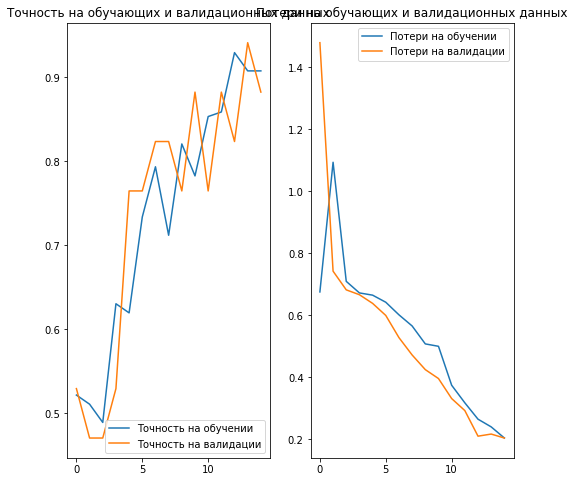

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точность на обучении')
plt.plot(epochs_range, val_acc, label='Точность на валидации')
plt.legend(loc='lower right')
plt.title('Точность на обучающих и валидационных данных')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Потери на обучении')
plt.plot(epochs_range, val_loss, label='Потери на валидации')
plt.legend(loc='upper right')
plt.title('Потери на обучающих и валидационных данных')
plt.savefig('./foo.png')
plt.show()

Num GPUs Available:  1
